In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fractal_dimension(Z, threshold=0.9):
    """
    The threshold is used to convert the image to binary.
    Usually images have 8-bit color depths, which map to 256 values for each pixel.
    Binary image has only 2 shades - black or white.
    """
    # Only for 2d image
    assert (len(Z.shape) == 2)

    # From https://github.com/rougier/numpy-100 (#87)
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
            np.arange(0, Z.shape[1], k), axis=1)

        # We count non-empty (0) and non-full boxes (k*k)
        return len(np.where((S > 0) & (S < k * k))[0])

    # Transform Z into a binary array
    Z = (Z < threshold)
    plt.imshow(Z)
    plt.show()

    # Minimal dimension of image
    p = min(Z.shape)

    # Greatest power of 2 less than or equal to p
    n = 2 ** (np.log(p) / np.log(2))

    # Extract the exponent
    n = int(np.log(n) / np.log(2))

    # Build successive box sizes (from 2**n down to 2**1)
    sizes = 2 ** np.arange(n, 1, -1)

    # Actual box counting with decreasing size
    counts = []
    for size in sizes:
        counts.append(boxcount(Z, size))

    # Fit the successive log(sizes) with log (counts)
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -coeffs[0]

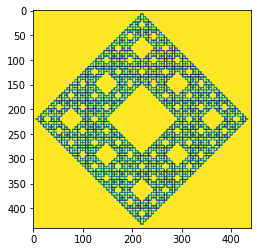

Computed Box-Counting Dimension:  1.6442512048599502
Theoretical:  1.5849625007211563


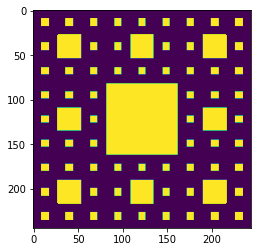

Computed Box-Counting Dimension:  1.4719806750010764
Theoretical:  1.5849625007211563


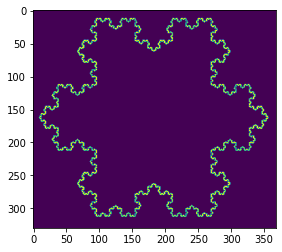

Computed Box-Counting Dimension:  1.3215737426881282
Theoretical:  1.2618595071429148


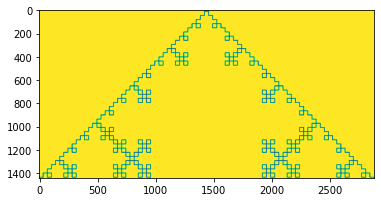

Computed Box-Counting Dimension:  1.2992066667079627
Theoretical:  1.46


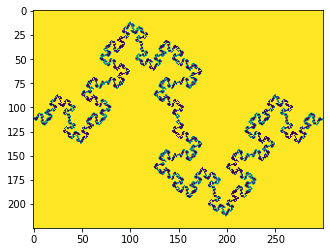

Computed Box-Counting Dimension:  1.4086046680283928
Theoretical:  1.5


In [3]:
special = ['https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/Peano_Sierpinski_carpet_4.svg/440px-Peano_Sierpinski_carpet_4.svg.png',
           'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/Quadratic_Koch_2.svg/2880px-Quadratic_Koch_2.svg.png',
           'https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Quadratic_Koch.svg/300px-Quadratic_Koch.svg.png'
           ]
images = ['https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/Peano_Sierpinski_carpet_4.svg/440px-Peano_Sierpinski_carpet_4.svg.png',
          'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Sierpinski_carpet_3.svg/244px-Sierpinski_carpet_3.svg.png',
          'https://upload.wikimedia.org/wikipedia/commons/f/f0/Flocke.PNG',
          'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/Quadratic_Koch_2.svg/2880px-Quadratic_Koch_2.svg.png',
          'https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Quadratic_Koch.svg/300px-Quadratic_Koch.svg.png'
          ]

dimensions = [(np.log(3) / np.log(2)), (np.log(3) / np.log(2)), (np.log(4) / np.log(3)), 1.46, 1.5]

for dim, im in zip(dimensions, images):
    # load im
    x = plt.imread(im)
    if im in special:
        print("Computed Box-Counting Dimension: ", fractal_dimension(x[:, :, 3], threshold=0.2))
        print("Theoretical: ", dim)
    else:
        print("Computed Box-Counting Dimension: ", fractal_dimension(x[:, :, 1], threshold=0.2))
        print("Theoretical: ", dim)